Plan du cours

 <img src="./img/AS_vs_ANS.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_vs_ANS_txt_1.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_vs_ANS_txt_2.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_vs_ANS_txt_3.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_vs_ANS_txt_4.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_1.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_1_txt_1.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_2.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_2_txt_1.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_2_txt_2.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_3.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_3_txt_1.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_3_txt_2.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_4.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_4_txt_1.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/AS_4_txt_2.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/cours_2_titre.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_titre.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_1.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_2.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_3.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_4.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_5.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_6.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_7.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_8.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_9.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_10.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_11.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_12.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_13.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_14.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_15.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_16.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_17.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_18.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_19.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_20.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_21.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_22.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_23.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_24.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_25.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_26.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_27.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_28.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_29.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_30.svg" alt="Drawing" style="width: 2000px;"/>

 <img src="./img/R_31.svg" alt="Drawing" style="width: 2000px;"/>

Validation croisée (titre)

# 2. Méthodes de validation

Si nous avions accès à (presque) toute la population pour réaliser nos analyses, les méthodes de validation seraient inutiles. Notre échantillon d'entraînement serait très bien généralisable à n'importe quel autre échantillon tiré au hasard d'une même population.

Cependant, on n'a jamais en pratique une telle taille d'échantillon.

Les méthode de validation sont donc extrêmement importantes afin d'évaluer la capacité des modèles estimés à prédire les futures données qui leur seront soumises!

Concrètement, on souhaite minimiser le biais (associé au sous-apprentissage), tout en minimisant la variance (associé au surapprentissagge).
* Minimiser le biais ET la variance est ce qui permet de minimiser l'erreur de prédiction sur de nouvelles données!

## 2.1. Trois ensembles de données distincts

La méthode la plus simple pour s'assurer d'optimiser la capacité de généralisation de notre modèle est de travailler avec trois ensembles de données:
1. Un ensemble d'entraînement.
2. Un ensemble de validation.
3. Un ensemble de test.

Les ensembles d'entrainement et de validation travaillent main dans la main pour trouver le meilleur compromis biais-variance.
- Pour obtenir un modèle qui apprenne suffisamment (qui évite le sous-apprentissage) tout en n'apprenant pas trop (qui évite le surapprentissage).

1. L'ensemble d'entraînement est utilisé pour estimer les paramètres du modèle.
2. L'ensemble de validation va évaluer la capacité de généralisation du modèle.
  - Aucune estimation des paramètres n'est alors réalisée.

On va généralement itérer entre les étapes 1 et 2, en faisant varier différents **hyperparamètres**.
- Un hyperparamètre est un paramètre dont la valeur est fixée avant le début de l'apprentissage.
- Un hyperparamètre est généralement associé à la forme du modèle ou à la procédure d'apprentissage.

Exemple : 
- On pourrait faire une régression linéaire multiple en utilisant trois modèles différents:
  - un modèle d'ordre 1 (linéaire);
  - un modèle d'ordre 2 (quadratique);
  - un modèle d'ordre 3 (cuubique).
- On estime les paramètres de chacun des trois modèles à l'aide du même ensemble d'entraînement.
- On vérifie ensuite quel modèle fait les meilleures prédictions à l'aide de l'ensemble de validation.
  - Le meilleur modèle sur l'ensemble de validation est notre modèle final.
  
Problème: l'évaluation de la capacité de généralisation de notre modèle est réalisée à l'aide d'un ensemble de données (l'ensemble de validation) qui a servi à la sélection du modèle... 
- L'ensemble de validation est en conflit d'intérêt!

Solution: l'évaluation finale de la capacité de généralisation de notre modèle est réalisée à l'aide d'un troisième ensemble de données, soit l'ensemble de test!

Note: il est très important que l'ordre des participants dans l'échantillon global soit rendu aléatoire avant de procéder à la division en trois sous-ensembles!
- Sinon, la variance d'un échantillon à l'autre sera plus grande et la capacité de généralisation en sera réduite.

Une difficulté est qu'on ne souhaite généralement pas diminuer la représentativité de notre ensemble d'entraînement en diminuant sa taille... or, ici, on doit diviser notre échantillon en trois sous-ensembles (entraînement, validation, test)!

Une manière de conserver ces trois étapes cruciales (entraînement, validation, test), tout en utilisant une portion plus importante de données pour l'estimation des paramètres est une méthode qu'on appelle **validation croisée**.

## 2.1. Validation croisée ("Cross-validation") 
L'objectif principal de la validation croisée est de réaliser les trois étapes que nous venons de voir (entraînement, validation, test) en divisant notre échantillon en seulement deux sous-ensembles, plutôt que trois:
1. Un ensemble "entraînement + validation".
2. Un ensemble de test.

### 2.1.1. Validation croisée "k-fold"

L'idée derrière la validation croisée est d'utiliser...:
- **Toutes** les données de l'ensemble 1 pour l'entraînement... et...
- **Toutes** les données de l'ensemble 1 pour la validation!

Pour expliquer la méthode, prenons directement un exemple. Considérons qu'on a un échantillon de 100 données.
1. D'abord, mettons de  20 données pour l'ensemble test.
  - Il nous reste 80 données pour l'ensemble "entraînement + validation".
2. Divisons l'ensemble "entraînement + validation" en 5 sous-groupes (appelons-les A, B, C, D, E).
  - On a 16 données par sous-groupe.
3. On va alors estimer à cinq reprises les paramètres de notre modèle.
  - Première fois: entraînement = A + B + C + D; validation = E. 
  - Deuxième fois: entraînement = A + B + C + E; validation = D. 
  - Troisième fois: entraînement = A + B + D + E; validation = C. 
  - Quatrième fois: entraînement = A + C + D + E; validation = B. 
  - Cinquième fois: entraînement = B + C + D + E; validation = A. 
    - L'erreur de validation est alors la moyenne de erreurs (au carré) pour les cinq itérations.
4. On peut alors répéter l'étape 3 pour différents hyperparamètres afin de sélectionner un modèle.
5. Une fois qu'un modèle final est sélectionné, il est entraîné cette fois avec l'ensemble des données de l'ensemble "entraînement + validation" et sa capacité de généralisation est évaluée à l'aide de l'ensemble test.

La méthode utilise généralement k = 5 ou k = 10 plis ("folds").
- Il a été supporté empiriquement que ces valeurs permettent généralement de limiter le biais la variance.

### 2.1.2. Validation croisée k = n ("leave one out").

Dans le cas où le nombre de données disponible est vraiment très faible, le cas particulier k = 1 peut être utilisé, puisqu'il permet de maximiser le nombre de données disponible pour chaque itération de l'entraînement.

Cependant, comme tous les sous-groupes de l'échantillon sont alors très similaires (chacun possède n-1 observations), le modèle obtenu risque d'être très représentatif de cet échantillon, mais de se généraliser plutôt mal à d'autres échantillons.
- On augmente la variance des modèles qui seraient obtenus à l'aide de différents échantillons!

### 2.1.3. Validation croisée hiérarchique ("nested")

Afin de maximiser encore plus le nombre

### 2.1.4. Le cas où on n'évalue qu'un seul ensemble d'hyperparamètres

Dans la discussion que nous avons eu jusqu'ici sur la validation, on a considéré que différents ensembles d'hyperparamètres étaient évalués et comparés, de manière à sélectionner celui qui se généralise le mieu.
- Lorsque c'est bien le cas, l'ensemble de validation est absolument 

Or, dans le cas où

# 3. Apprentissage supervisé : régression

Régression linéaire dans la population :
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... +  \beta_p X_p + \epsilon$$

Régression linéaire estimée dans l'échantillon :
$$Y = \hat{\beta_0} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 + ... + \hat{\beta_p}X_p + \epsilon$$

En statistique inférentielles classiques, on cherche à minimiser l'erreur de prédiction dans l'échantillon.
- L'objectif est de déterminer quels prédicteurs ($X_1, X_2, ...$) contribuent à expliquer la variance dans la variable prédite ($Y$).
  - La fonction de coût correspond généralement au carré moyen de l'erreur (*Mean Squared Error*, MSE) donnée par: 
  $$MSE = \frac{1}{N-1} \sum_{i=1}^{N} (Y_i - \hat{Y})^2$$

En apprenntissage machine, on cherche à minimiser l'erreur de prédiction dans l'ensemble de données "test".
- L'objectif est de prédire correctement les valeurs $Y$ pour des nouvelles observations ($X_1, X_2, ...$).
  - Si on utilise simplement la même fonction de coût, on risque un surapprentissage...
  
**Voyons l'application de la méthode "saveur vanille"**

## 3.1. Régression linéaire simple

### ÉTAPE 1 :  importer les librairies utiles

In [84]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

### ÉTAPE 2 : importer les fonctions utiles

In [63]:
# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import LinearRegression

### ÉTAPE 3 : importer (ici on construit) et préparer le jeu de données 

In [68]:
# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Créons un échantillon de données
X, y = mglearn.datasets.make_wave(n_samples=60)

# Séparons aléatoirement nos données en deux sous-ensembles "Entraînement" et "Test"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### ÉTAPE 4 : Entraîner le modèle (ensemble "Entraînement")

w[0]: 0.393906  b: -0.031804
lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


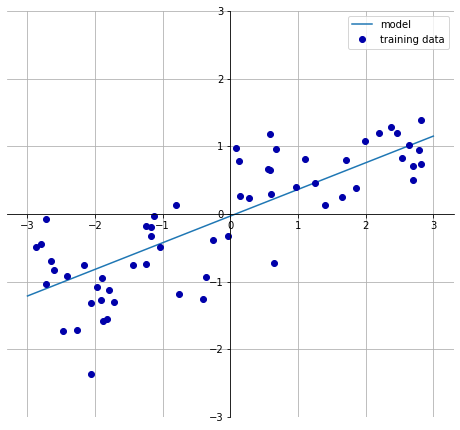

In [69]:
# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
lr = LinearRegression().fit(X_train, y_train)

# Affichons le graphique incluant la droite de régession
mglearn.plots.plot_linear_regression_wave()

# Affichons les valeurs des coefficients
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

### ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")

In [70]:
# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


### CODE COMPLET (régression linéaire "sans régularisation")

w[0]: 0.393906  b: -0.031804
lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


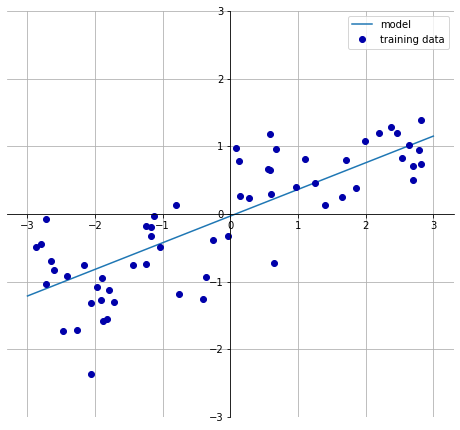

In [71]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import LinearRegression


# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Créons un échantillon de données
X, y = mglearn.datasets.make_wave(n_samples=60)

# Séparons aléatoirement nos données en deux sous-ensembles "Entraînement" et "Test"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
lr = LinearRegression().fit(X_train, y_train)

# Affichons le graphique incluant la droite de régession
mglearn.plots.plot_linear_regression_wave()

# Affichons les valeurs des coefficients
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

### Discussion de la régression linéaire simple

- Notre modèle n'a pas une très performance à l'entraînement.
  - Ce qui représente un problème de sous-apprentissage, liée à un biais important.
  

- Toutefois, notre modèle généralise très bien cette performance à l'ensemble test!
  - Pas de problème lié à la variabilité du modèle!
  

- Comment pourrions-nous améliorer l'apprentissage?
  1. Ajouter des données!
  2. Complexifier le modèle! (toutefois ici, comme on a créé un jeu de données, il n'existe aucun autre prédicteur possible).

### Option 1 : Ajouter des données (passons de 60 à 600 !)

w[0]: 0.393906  b: -0.031804
lr.coef_: [0.45053442]
lr.intercept_: 0.06878142557298995
Training set score: 0.63
Test set score: 0.63


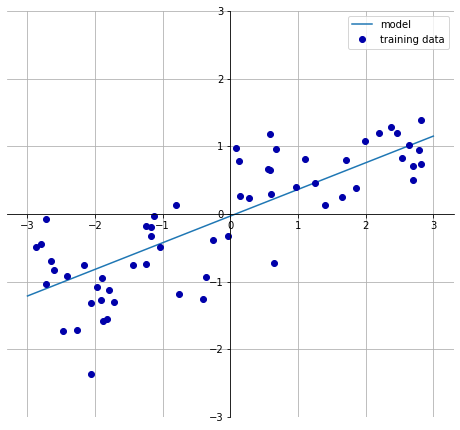

In [82]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import LinearRegression


# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Créons un échantillon de données
# ================================================== Modification ============================================
# X, y = mglearn.datasets.make_wave(n_samples=60)
X, y = mglearn.datasets.make_wave(n_samples=600)
# ============================================================================================================

# Séparons aléatoirement nos données en deux sous-ensembles "Entraînement" et "Test"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
lr = LinearRegression().fit(X_train, y_train)

# Affichons le graphique incluant la droite de régession
mglearn.plots.plot_linear_regression_wave()

# Affichons les valeurs des coefficients
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

- On note qu'augmenter les donnes n'a pas ici un effet important.
  - On pourrait alors tenter une régression utilisant un modèle plus complexe!
  

- **Pour présenter l'impact de modèles plus complexes, utilisons un jeu de données différent.**
  - Utilisons le "Boston Housing dataset":
    - Taille de l'échantillon : 506 observatons multivariées.
    - Nombre de variables : 105.

## 3.2. Régression linéaire multiple

La seule différence ici est qu'on importe un jeu de données comportant plusieurs prédicteurs,
plutôt qu'un seul.

In [36]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import LinearRegression


# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# On importe un jeu de données comportant 105 prédicteurs
# ================================================== Modification ============================================
# X, y = mglearn.datasets.make_wave(n_samples=60)
X, y = mglearn.datasets.load_extended_boston()
# ============================================================================================================

# Séparons aléatoirement nos données en deux sous-ensembles "Entraînement" et "Test"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
lr = LinearRegression().fit(X_train, y_train)

# ================================================== Modification ============================================
# On retire la courbe de régression linéaire simple

# Affichons le graphique incluant la droite de régession
# mglearn.plots.plot_linear_regression_wave()
# ============================================================================================================

# Affichons les valeurs des coefficients
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

### Discussion de la régression linéaire multiple

- Notre modèle a pas une très bonne performance à l'entraînement!
  - Pas de problème lié au biais!
  - Pas de problème de sous-apprentissage!
  

- Toutefois, notre modèle ne généralise pas très bien cette performance à l'ensemble test.
  - Problème lié à la variabilité du modèle.
  - Problème de surapprentissage.
  

- Comment pourrions-nous améliorer l'apprentissage?
  1. Ajouter des données! (toutefois ici, nous n'en avons pas d'autre)
  2. Complexifier le modèle! (toutefois ici, nous n'avons pas d'autre prédicteur).
    - On pourrait augmenter l'ordre du modèle (pas limité à seulement linéaire).
  3. On pourrait utiliser de la régularisation!
  
- En régression, on utilise généralement deux types de régularisation:
  1. Régularisation L1 (Lasso)
  2. Régularisation L2 (Ridge)

## 3.4. Régression linéaire multiple (Ridge)

...

### Modifications Ridge

Le code demeure très similaire. On applique des changements à seulement deux étapes.

- ÉTAPE 1 : importation des librairies utiles
  - Inchangée
  
- ÉTAPE 2 : importation des fonctions utiles
  - On importe la fonction "Ridge" plutôt que la fontion "linearRegression".
  
- ÉTAPE 3 : importation et préparation du jeu de données
  - Inchangée

- ÉTAPE 4 : entraînement du modèle
  - On utilise maintenant la régularisation "Ridge" plutôt que la régression linéaire "vanille".
  - On calcule la taille d'efet de la phase "entraînement" pour le modèle utilisant la régression "Ridge".
  
- ÉTAPE 5 : vérification de la généralisabilité du modèle
  - On calcule la taille d'effet de la phase "test" pour le modèle utilisant la régression "Ridge".

### ÉTAPE 2 (modifications Ridge)

In [ ]:
# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
# ================================================== Modification ============================================
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# ============================================================================================================

### ÉTAPE 4 (modifications Ridge)

In [ ]:
# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
# ================================================== Modification ============================================
# lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
# ============================================================================================================

# Affichons les valeurs des coefficients
# ================================================== Modification ============================================
# print("lr.coef_: {}".format(lr.coef_))
print("ridge.coef_: {}".format(ridge.coef_))

# print("lr.intercept_: {}".format(lr.intercept_))
print("ridge.intercept_: {}".format(ridge.intercept_))
# ============================================================================================================

### ÉTAPE 5 (modifications Ridge)

In [ ]:
# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Affichons les tailles d'effet R-deux
# ================================================== Modification ============================================
# print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

# print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
# ============================================================================================================

### CODE COMPLET (Ridge)

In [30]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import Ridge


# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons l'échantillon de données "Boston Housing dataset"
X, y = mglearn.datasets.load_extended_boston()

# Séparons aléatoirement nos données en deux sous-ensembles "Entraînement" et "Test"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
ridge = Ridge().fit(X_train, y_train)

# Affichons les valeurs des coefficients
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))


# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge.coef_: [-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589755e+00
  1.31207081e+00  1.71845119e+00 -2.59766697e+00 -1.32370675e+00
 -2.81242223

### Discussion Ridge

- On a augmenté le biais légèrement et on a diminué la variance de manière importante.


- on a donc diminué le surapprentissage et amélioré la généralisation!
  - C'est ce qui nous importe le plus!
  
  
- On a toutefois utilisé l'hyperparamètre **alpha** associé à la régression Ridge.
  - Plus la valeur de **alpha** est élevée, plus on cherche à diminuer la taille des pararmètres.
  

- On pourrait utiliser la validation croisée pour trouver une meilleure valeur pour l'hyperparamètre alpha et garder un ensemble test pour évaluer la capacité de généralisation finale.

### ÉTAPE 2 (modifications pour Ridge avec validation croisée)


In [ ]:
# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import Ridge

# ================================================== Modification ============================================
# Importer la fonction de validation croisée
from sklearn.model_selection import cross_val_score
# ============================================================================================================

### ÉTAPE 4 (modifications pour Ridge avec validation croisée)

In [24]:
# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_1 = Ridge(alpha=1).fit(X_train, y_train)
ridge_10 = Ridge(alpha=10).fit(X_train, y_train)

# ================================================== Modification ============================================
# Faisons trois itérations d'une validation croisée à 5 "folds"
scores_01 = cross_val_score(ridge_01, X_train, y_train, cv=5)  # alpha=0.1
scores_1 = cross_val_score(ridge_1, X_train, y_train, cv=5)  # alpha=1
scores_10 = cross_val_score(ridge_10, X_train, y_train, cv=5)  # alpha=10

# Affichons les performances pour chaque alpha
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_01.mean(), scores_01.std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_10.mean(), scores_10.std() * 2))
# ============================================================================================================

# Affichons les valeurs des coefficients
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

Accuracy: 0.85 (+/- 0.19)
Accuracy: 0.82 (+/- 0.15)
Accuracy: 0.74 (+/- 0.12)


### ÉTAPE 5 (modifications pour Ridge avec validation croisée)

In [ ]:
# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# ================================================== Modification ============================================
# Sélectionner le modèle ayant l'alpha le plus performant sur l'ensemble de validation 
ridge = ridge_01
# ============================================================================================================

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

### CODE COMPLET (Ridge avec validation croisée)

In [59]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import Ridge

# Importer la fonction de validation croisée
from sklearn.model_selection import cross_val_score


# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons l'échantillon de données "Boston Housing dataset"
X, y = mglearn.datasets.load_extended_boston()

# Séparons aléatoirement nos données en deux sous-ensembles "Entraînement" et "Test"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
ridge_001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_1 = Ridge(alpha=1).fit(X_train, y_train)
ridge_10 = Ridge(alpha=10).fit(X_train, y_train)
ridge_100 = Ridge(alpha=100).fit(X_train, y_train)

# Faisons trois itérations d'une validation croisée à 5 "folds"
scores_001 = cross_val_score(ridge_001, X_train, y_train, cv=5)  # alpha=0.01
scores_01 = cross_val_score(ridge_01, X_train, y_train, cv=5)  # alpha=0.1
scores_1 = cross_val_score(ridge_1, X_train, y_train, cv=5)  # alpha=1
scores_10 = cross_val_score(ridge_10, X_train, y_train, cv=5)  # alpha=10
scores_100 = cross_val_score(ridge_100, X_train, y_train, cv=5)  # alpha=100

# Affichons les performances pour chaque alpha
print("scores_001: Accuracy: %0.2f (+/- %0.2f)" % (scores_001.mean(), scores_01.std() * 2))
print("scores_01:  Accuracy: %0.2f (+/- %0.2f)" % (scores_01.mean(), scores_01.std() * 2))
print("scores_1:   Accuracy: %0.2f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
print("scores_10:  Accuracy: %0.2f (+/- %0.2f)" % (scores_10.mean(), scores_10.std() * 2))
print("scores_100: Accuracy: %0.2f (+/- %0.2f)" % (scores_100.mean(), scores_10.std() * 2))

scores_001: Accuracy: 0.84 (+/- 0.19)
scores_01:  Accuracy: 0.85 (+/- 0.19)
scores_1:   Accuracy: 0.82 (+/- 0.15)
scores_10:  Accuracy: 0.74 (+/- 0.12)
scores_100: Accuracy: 0.54 (+/- 0.12)


In [60]:
# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Sélectionner le modèle ayant l'alpha le plus performant sur l'ensemble de validation 
ridge = ridge_01

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Affichons les valeurs des coefficients
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))

Training set score: 0.93
Test set score: 0.77
ridge.coef_: [-2.33300720e+00 -5.44192850e+00 -6.12865463e+00 -7.78524693e-01
  1.29152995e+00  1.90222839e+01  4.35864731e+00 -1.11911067e+01
  9.55539672e+00 -7.48671406e-01 -5.33307088e-01  6.23384946e+00
 -2.72886731e+00  5.86117121e+00  2.28233711e-02 -9.01608311e-01
  4.66756441e+00 -3.37983354e+00  1.31611460e+00 -3.48895554e+00
  4.41536215e-01 -3.51941085e+00 -2.52222659e+00 -2.69562070e+00
  2.44649480e-01 -1.02306604e+00  3.04223584e+00 -2.68804128e+00
  4.28396019e+00 -2.94109311e+00  8.70934702e+00 -3.13683472e+00
 -2.91608183e-01  2.17487375e+00  3.62658111e+00  2.30047840e+00
 -2.83789461e+00 -6.17207969e+00  7.94858912e+00  1.65631996e+00
  8.72779643e+00  1.08042552e+00  5.72208008e+00 -4.76401068e+00
  5.07461001e+00  8.01603635e+00 -8.44254041e+00 -6.44526450e-01
 -1.42288399e+01 -7.78524693e-01 -1.38982595e+01 -1.59298479e+01
  6.42600904e+00 -1.85273659e+00  6.37949850e+00  4.03122648e+00
 -9.48053011e-01  1.11134392e+0

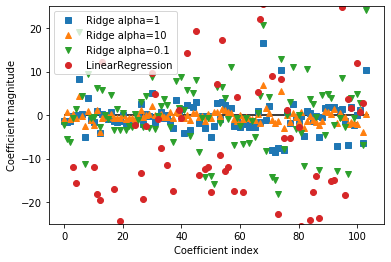

In [61]:
plt.plot(ridge_1.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge_10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge_01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## 3.5. Régression linéaire multiple (Lasso)
...

In [67]:
# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import Lasso

# Importer la fonction de validation croisée
from sklearn.model_selection import cross_val_score

### ÉTAPE 2 (modifications pour Lasso avec validation croisée)

In [68]:
# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# ================================================== Modification ============================================
# Importer le modèle de régression linéaire de sklearn
# from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso  # On change "Ridge" pour "Lasso" 
# ============================================================================================================

# Importer la fonction de validation croisée
from sklearn.model_selection import cross_val_score

### ÉTAPE 4 (modifications pour Lasso avec validation croisée)

In [69]:
# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# ================================================== Modification ============================================

# On change l'utilisation de la fonction "Ridge" pour "Lasso"

# Entraînons notre modèle
lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso_01 = Lasso(alpha=0.1).fit(X_train, y_train)
lasso_1 = Lasso(alpha=1).fit(X_train, y_train)
lasso_10 = Lasso(alpha=10).fit(X_train, y_train)
lasso_100 = Lasso(alpha=100).fit(X_train, y_train)

# Faisons trois itérations d'une validation croisée à 5 "folds"
scores_001 = cross_val_score(lasso_001, X_train, y_train, cv=5)  # alpha=0.01
scores_01 = cross_val_score(lasso_01, X_train, y_train, cv=5)  # alpha=0.1
scores_1 = cross_val_score(lasso_1, X_train, y_train, cv=5)  # alpha=1
scores_10 = cross_val_score(lasso_10, X_train, y_train, cv=5)  # alpha=10
scores_100 = cross_val_score(lasso_100, X_train, y_train, cv=5)  # alpha=100
# ============================================================================================================

# Affichons les performances pour chaque alpha
print("scores_001: Accuracy: %0.2f (+/- %0.2f)" % (scores_001.mean(), scores_001.std() * 2))
print("scores_01:  Accuracy: %0.2f (+/- %0.2f)" % (scores_01.mean(), scores_01.std() * 2))
print("scores_1:   Accuracy: %0.2f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
print("scores_10:  Accuracy: %0.2f (+/- %0.2f)" % (scores_10.mean(), scores_10.std() * 2))
print("scores_100: Accuracy: %0.2f (+/- %0.2f)" % (scores_100.mean(), scores_10.std() * 2))

scores_001: Accuracy: 0.80 (+/- 0.27)
scores_01:  Accuracy: 0.72 (+/- 0.20)
scores_1:   Accuracy: 0.28 (+/- 0.11)
scores_10:  Accuracy: -0.03 (+/- 0.05)
scores_100: Accuracy: -0.03 (+/- 0.05)


In [70]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire de sklearn
from sklearn.linear_model import Lasso

# Importer la fonction de validation croisée
from sklearn.model_selection import cross_val_score


# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons l'échantillon de données "Boston Housing dataset"
X, y = mglearn.datasets.load_extended_boston()

# Séparons aléatoirement nos données en deux sous-ensembles "Entraînement" et "Test"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

# Entraînons notre modèle
lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso_01 = Lasso(alpha=0.1).fit(X_train, y_train)
lasso_1 = Lasso(alpha=1).fit(X_train, y_train)
lasso_10 = Lasso(alpha=10).fit(X_train, y_train)
lasso_100 = Lasso(alpha=100).fit(X_train, y_train)


# Faisons trois itérations d'une validation croisée à 5 "folds"
scores_001 = cross_val_score(lasso_001, X_train, y_train, cv=5)  # alpha=0.01
scores_01 = cross_val_score(lasso_01, X_train, y_train, cv=5)  # alpha=0.1
scores_1 = cross_val_score(lasso_1, X_train, y_train, cv=5)  # alpha=1
scores_10 = cross_val_score(lasso_10, X_train, y_train, cv=5)  # alpha=10
scores_100 = cross_val_score(lasso_100, X_train, y_train, cv=5)  # alpha=100

# Affichons les performances pour chaque alpha
print("scores_001: Accuracy: %0.2f (+/- %0.2f)" % (scores_001.mean(), scores_001.std() * 2))
print("scores_01:  Accuracy: %0.2f (+/- %0.2f)" % (scores_01.mean(), scores_01.std() * 2))
print("scores_1:   Accuracy: %0.2f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
print("scores_10:  Accuracy: %0.2f (+/- %0.2f)" % (scores_10.mean(), scores_10.std() * 2))
print("scores_100: Accuracy: %0.2f (+/- %0.2f)" % (scores_100.mean(), scores_10.std() * 2))

scores_001: Accuracy: 0.80 (+/- 0.27)
scores_01:  Accuracy: 0.72 (+/- 0.20)
scores_1:   Accuracy: 0.28 (+/- 0.11)
scores_10:  Accuracy: -0.03 (+/- 0.05)
scores_100: Accuracy: -0.03 (+/- 0.05)


In [71]:
# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------

# Sélectionner le modèle ayant l'alpha le plus performant sur l'ensemble de validation 
lasso = lasso_001

# Affichons les tailles d'effet R-deux
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

# Affichons les valeurs des coefficients
print("ridge.coef_: {}".format(lasso.coef_))
print("ridge.intercept_: {}".format(lasso.intercept_))

Training set score: 0.90
Test set score: 0.77
ridge.coef_: [ -0.          -0.          -0.           0.          -0.
   0.          -0.          -1.43260465  10.94771183   0.
   0.           0.          -0.39260971  -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -8.75628457  -0.          -0.          -0.
  -0.           2.10027365  -0.           0.          -0.
   0.          -0.           0.           0.          -0.
   0.          -0.          -0.           0.           0.
   0.          -0.           0.          -3.96958293   0.
   6.61845793  -0.          -0.          -0.           0.
  -4.42086828  -2.10371434   3.79607992  -0.           4.38591262
   0.           0.           0.1795777   -0.          -1.1614282
  -4.33485764  -0.          -0.          -2.13549022  -0.
  -1.85967636  -0.          -0.          29.81957225  -2.05624806
   0.         -11.98034348 -11.14870694 -11.67147204  12.974385
 -10.93053676  -0.          -0.           

Text(0, 0.5, 'Coefficient magnitude')

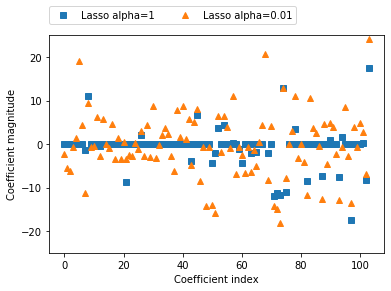

In [72]:
plt.plot(lasso_001.coef_, 's', label="Lasso alpha=1")
plt.plot(ridge_01.coef_, '^', label="Lasso alpha=0.01")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## 3.6. Régression linéaire multiple (ElasticNet)

...


# 4. Apprentissage supervisé: classification

- Un type d'analyse souvent réalisé en statistiques inférentielles classiques cherche à rejeter l'hypothèse nulle selon laquelle deux groupes d'individus proviennent de la même population en ce qui a trait à une ou plusieurs variables.
  - Le chercheur tente alors de supporter une hypotèse alternative selon laquelle les individus peuvent être séparés en deux groupes à l'aide d'une ou plusieurs variable (ex. test t, ANOVA).
  - La conclusion de l'analyse sera appliquée au niveau des **groupes** d'inidividus.
  - La généralisation des résultats dépendra du respect des postulats et de la gestion des données manquantes/extrêmes/influentes.
  
  
- En apprentissage machine, on tentera plutôt de prédire auquel des groupes appartiendra un individu futur en fonction de mesures sur une ou plusieurs variables.
  - La conclusion de l'analyse est applicable au niveau des **individus**.
  - La généralisation des résultats sera évaluée à l'aide d'un ensemble "test".

## 4.1. Régression logistique


- On peut réutiliser la régression linéaire présentée à la section 3 pour solutionner un problème de classification.


- Cependant, la valeur prédite n'est pas la somme des valeurs pondérées des prédicteurs.
  - Plutôt, on applique une fonction en sortie qui estime si la valeur prédite est positive ou négative.
  - Si la valeur est positive, alors on classe l'observation dans la classe A.
  - Si la valeur est négative, alors on classe l'observation dans la classe B.
  
$$\hat{Y} = \hat{\beta_0} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 + ... + \hat{\beta_p}X_p > 0$$


- Ainsi, la régression correspond ici à la **frontière** entre les classes.

### ÉTAPE 1: importer les librairies utiles

In [57]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ÉTAPE 2: importer les fonctions utiles

In [58]:
# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction permettant d'importer un jeu de données sur le cancer
from sklearn.datasets import load_breast_cancer

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.linear_model import LogisticRegression

# Importer la fonction de validation croisée
from sklearn.model_selection import cross_val_score

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### ÉTAPE 3:  importer et préparer le jeu de données

In [59]:
# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importer le jeux de données d'entraînement et de test.
cancer = load_breast_cancer()

# Séparons aléatoirement nos données en deus sous-ensembles "Entraînement" et "Test".
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

### ÉTAPE 4: définir et entraîner le modèle

In [76]:
# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
logreg=LogisticRegression(solver='lbfgs', max_iter=100000)

# Entraîner le modèle
logreg.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))

Training set score: 0.958


### ÉTAPE 5: vérifier la généralisabilité des résultats

In [75]:
# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


y_pred = logreg.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: \n\n', cfm, '\n\n')
print('Classification report: \n\n', classification_report(y_test, y_pred))

Training set score: 0.958
Test set score: 0.958
Confusion matrix: 

 [[48  5]
 [ 1 89]] 


Classification report: 

               precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### Limites de la régression logistique

- Les paramètres du modèle sont instables si:
  - Si les classes sont relativement bien séparées;
  - Si N est petit.
  
  
- Si on a plus de deux classes, on doit faire une série de régression logistiques, car autant de frontières que de classes.
  - Chaque chaque frontière sépare une classe du reste des classes.
  
- Néanmoins, quand on a suffisamment de données, la régression logistique est une méthode efficace et rapide pour les cas où on a seulement une décision binaire à faire.

## 4.2. Analyse discriminante linéaire

- L'analyse discriminante linéaire permet de pallier les limites de la régression logistique.

- Elle a pour objectif de:
  - Maximiser la différence entre les centroïdes des classes.
  - Minimiser la variabilité à l'intérieur des classes.


- Critère à minimiser:
$$\frac{\mu_1 -\mu_2}{s_1^2 + s_2^2}$$


- L'analyse trouve d'abord un premier axe sur lequel projeter les observations.
  - L'axe qui minimise le critère précédant.
  

- L'analyse trouve ensuite le deuxième axe minimisant le même critère... etc.

### ÉTAPE 1: importer les librairies utiles

In [1]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ÉTAPE 2: importer les fonctions utiles

In [2]:
# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer une fonction permettant d'importer un jeu de données sur le cancer
from sklearn.datasets import load_breast_cancer

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importer la fonction de validation croisée
from sklearn.model_selection import cross_val_score

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### ÉTAPE 3: importer et préparer le jeu de données

In [3]:
# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importer le jeux de données d'entraînement et de test.
cancer = load_breast_cancer()

# Séparons aléatoirement nos données en deus sous-ensembles "Entraînement" et "Test".
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

### ÉTAPE 4: définir et entraîner le modèle

In [7]:
# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
lda= LinearDiscriminantAnalysis(n_components=1)

# Entraîner le modèle
lda_model = lda.fit(X_train, y_train)

### ÉTAPE 5: vérifier la généralisabilité des résultats

In [9]:
# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------
print("Test set score: {:.3f}".format(lda.score(X_test, y_test)))

y_pred = lda_model.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: \n\n', cfm, '\n\n')
print('Classification report: \n\n', classification_report(y_test, y_pred))

Test set score: 0.951
Confusion matrix: 

 [[47  6]
 [ 1 89]] 


Classification report: 

               precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

